# Data Drift in ML Production. How to measure? 👇

One way is to use Kullback-Leibler (KL) divergence.

🧠 𝐖𝐡𝐚𝐭 𝐢𝐬 𝐊𝐋 𝐃𝐢𝐯𝐞𝐫𝐠𝐞𝐧𝐜𝐞?

KL divergence is a measure that quantifies how one probability distribution differs from another reference distribution. 

🤔 𝐇𝐨𝐰 𝐢𝐬 𝐊𝐋 𝐃𝐢𝐯𝐞𝐫𝐠𝐞𝐧𝐜𝐞 𝐔𝐬𝐞𝐝 𝐢𝐧 𝐃𝐚𝐭𝐚 𝐃𝐫𝐢𝐟𝐭 𝐌𝐨𝐧𝐢𝐭𝐨𝐫𝐢𝐧𝐠?

When an ML model is deployed, KL divergence can continuously track the difference between the training data distribution (reference) and the live (production data). 

⚠️ If KL divergence increases beyond a certain threshold, it signals that the data has drifted, which could mean that the model's performance is at risk.

🟢 𝐀𝐝𝐯𝐚𝐧𝐭𝐚𝐠𝐞 𝐨𝐟 𝐊𝐋 𝐃𝐢𝐯𝐞𝐫𝐠𝐞𝐧𝐜𝐞:

KL divergence is highly sensitive to even minor shifts in distribution. 

It makes it handy for detecting subtle forms of data drift early and model performance may decrease.


🔴 𝐃𝐢𝐬𝐚𝐝𝐯𝐚𝐧𝐭𝐚𝐠𝐞 𝐨𝐟 𝐊𝐋 𝐃𝐢𝐯𝐞𝐫𝐠𝐞𝐧𝐜𝐞:

While sensitivity is a strength, it can also be a drawback.

KL divergence may flag small deviations (e.g., outliers or noise) as data drift, leading to false alarms. 

Tuning the thresholds and combining it with other metrics is often necessary.

👍 Like it, so I know which topics to post more about!

♻️ Share it, so your network knows what you are interested in!

P.S. How do you handle data drift in your MLOps systems?

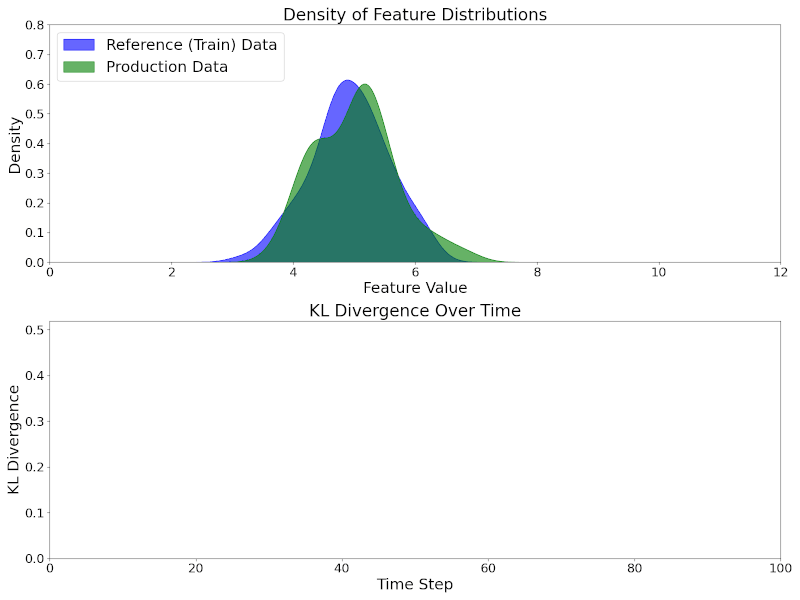

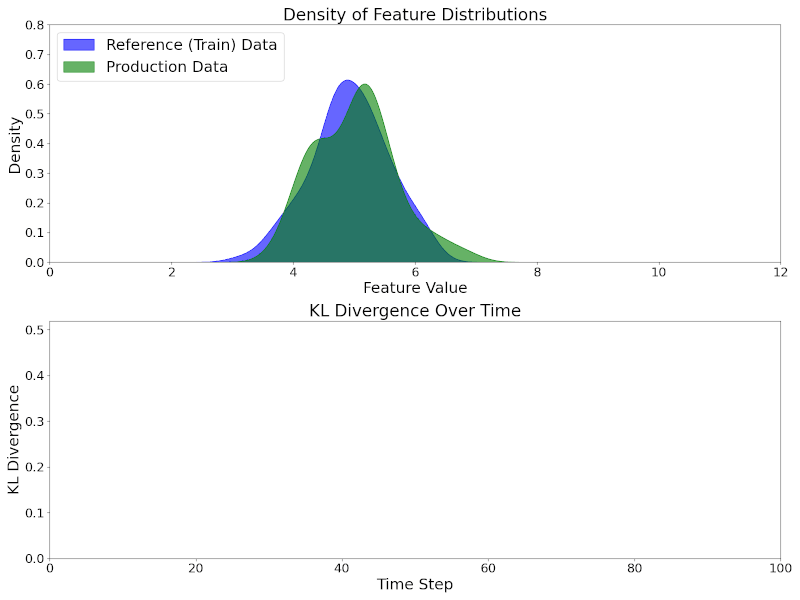|

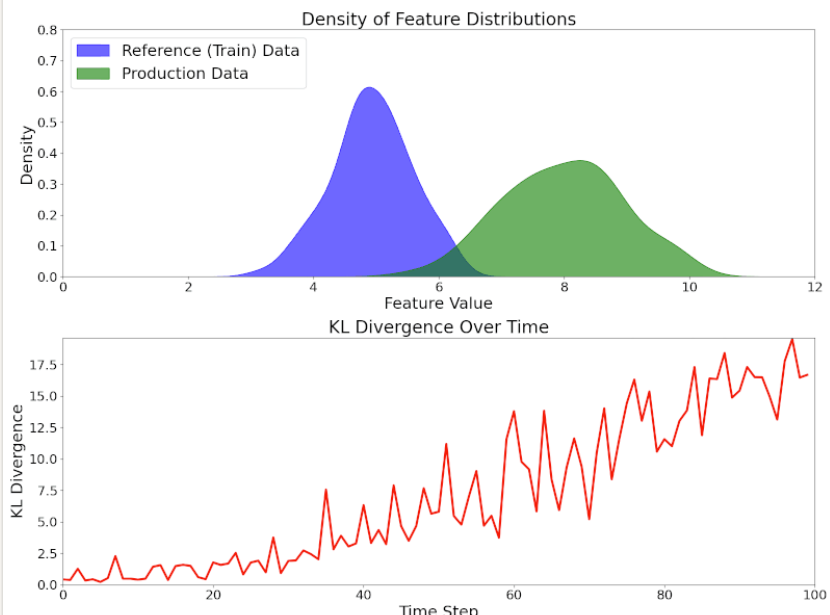

KL Divergence between P and Q: 0.0027233287692070007


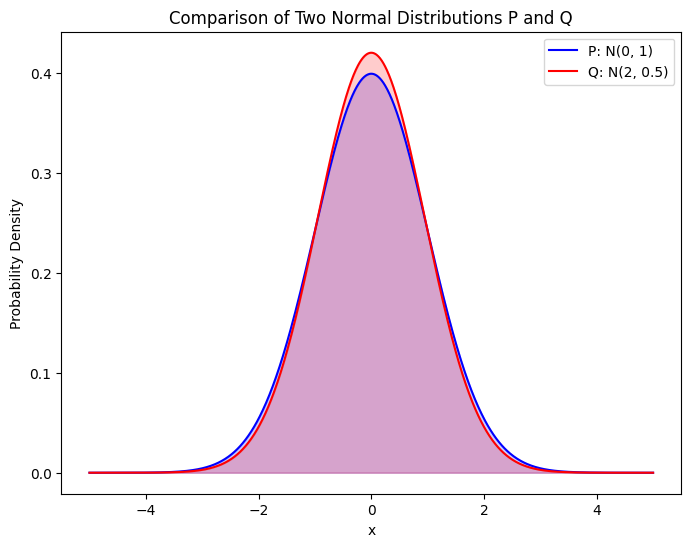

In [3]:
import torch
import torch.distributions as dist
import numpy as np
import matplotlib.pyplot as plt
from torch.distributions.kl import kl_divergence

# Define two normal distributions P and Q
P = dist.Normal(torch.tensor([0.0]), torch.tensor([1.0]))  # Mean = 0, Std = 1
Q = dist.Normal(torch.tensor([0.0]), torch.tensor([0.95]))  # Mean = 2, Std = 0.5

# Calculate KL divergence D_KL(P || Q)
kl_div = kl_divergence(P, Q)
print(f"KL Divergence between P and Q: {kl_div.item()}")

# Plot the two distributions P and Q
x = np.linspace(-5, 5, 1000)
p = P.log_prob(torch.tensor(x)).exp().numpy()  # Probability values of P
q = Q.log_prob(torch.tensor(x)).exp().numpy()  # Probability values of Q

plt.figure(figsize=(8, 6))
plt.plot(x, p, label="P: N(0, 1)", color="blue")
plt.plot(x, q, label="Q: N(2, 0.5)", color="red")
plt.fill_between(x, p, color="blue", alpha=0.2)
plt.fill_between(x, q, color="red", alpha=0.2)
plt.title("Comparison of Two Normal Distributions P and Q")
plt.xlabel("x")
plt.ylabel("Probability Density")
plt.legend()
plt.show()


KL Divergence between P and Q: 8.806852340698242


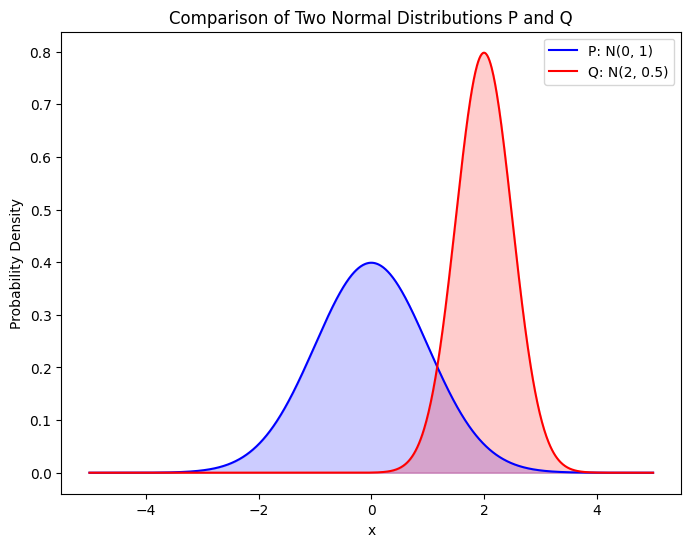

In [8]:
import torch
import torch.distributions as dist
import numpy as np
import matplotlib.pyplot as plt
from torch.distributions.kl import kl_divergence

# Define two normal distributions P and Q
P = dist.Normal(torch.tensor([0.0]), torch.tensor([1.0]))  # Mean = 0, Std = 1
Q = dist.Normal(torch.tensor([2.0]), torch.tensor([0.5]))  # Mean = 2, Std = 0.5

# Calculate KL divergence D_KL(P || Q)
kl_div = kl_divergence(P, Q)
print(f"KL Divergence between P and Q: {kl_div.item()}")

# Plot the two distributions P and Q
x = np.linspace(-5, 5, 1000)
p = P.log_prob(torch.tensor(x)).exp().numpy()  # Probability values of P
q = Q.log_prob(torch.tensor(x)).exp().numpy()  # Probability values of Q

plt.figure(figsize=(8, 6))
plt.plot(x, p, label="P: N(0, 1)", color="blue")
plt.plot(x, q, label="Q: N(2, 0.5)", color="red")
plt.fill_between(x, p, color="blue", alpha=0.2)
plt.fill_between(x, q, color="red", alpha=0.2)
plt.title("Comparison of Two Normal Distributions P and Q")
plt.xlabel("x")
plt.ylabel("Probability Density")
plt.legend()
plt.show()
